In [1]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [10]:
from NeuralNetwork import Neural_Network
from GD_class import GradientDescent
from cost_functions import grad_cost_logreg
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tqdm import tqdm 

import seaborn as sns


def plot_heatmap(values, x_ticks, y_ticks, x_label, y_label, title):
    fig, ax = plt.subplots(figsize = (6, 5))
    heatmap = sns.heatmap(values, annot=True, ax=ax, cmap="viridis")
    heatmap.set_xticklabels(x_ticks)
    heatmap.set_yticklabels(y_ticks)
    ax.set_title(title)
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)
    plt.show()

# Loading the dataset

In [3]:
cancer = load_breast_cancer()
X_orig = jnp.array(cancer.data)
target = jnp.array(cancer.target)
target = target.reshape(len(target), 1)


# Splitting into training and test set

In [4]:
test_size = 0.2
X_train, X_test, target_train, target_test = train_test_split(X_orig, target, test_size=test_size)

# Scaling the data

In [5]:
# Using the StandardScaler from scikit learn

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Setting up the neural network

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functi

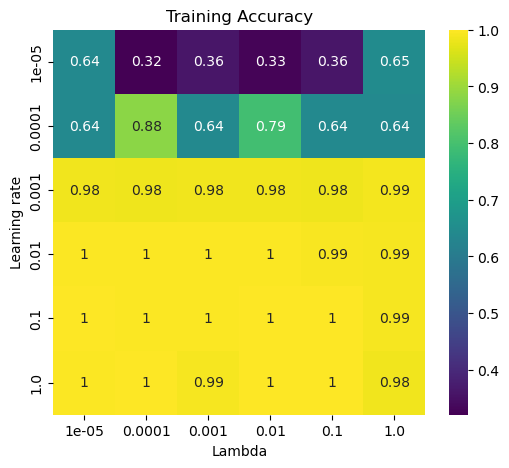

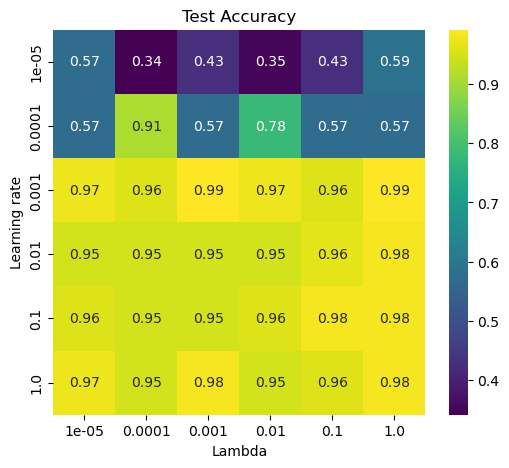

In [6]:
# Choose number of hidden layers and nodes
n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
n_features = X_train.shape[1]

learning_rates = np.logspace(-5, 0, 6)
lmbd_vals = np.logspace(-5, 0, 6)

accuracy_train = np.zeros((len(learning_rates), len(lmbd_vals)))
accuracy_test = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):

        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X_train_scaled, target_train, num_iter=1000)
        pred_train = ffnn.predict(X_train_scaled)
        pred_test = ffnn.predict(X_test_scaled)

        accuracy_train[i][j] = accuracy_score(target_train, pred_train)
        accuracy_test[i][j] = accuracy_score(target_test, pred_test)

plot_heatmap(accuracy_train, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Training Accuracy")

plot_heatmap(accuracy_test, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Test Accuracy")


C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functi

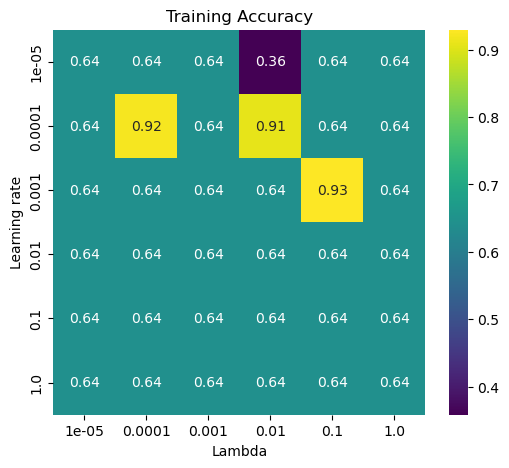

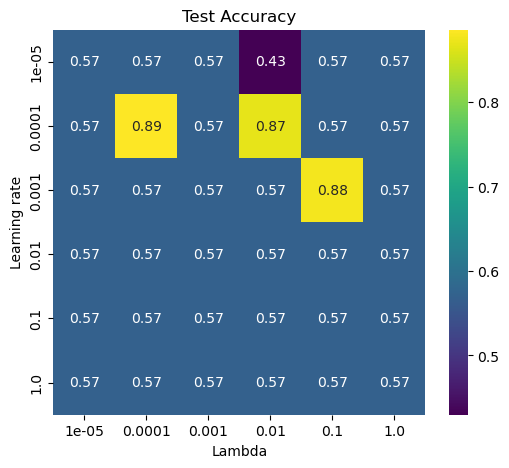

In [7]:
# Testing without scaling the data

# Choose number of hidden layers and nodes
n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
n_features = X_train.shape[1]

learning_rates = np.logspace(-5, 0, 6)
lmbd_vals = np.logspace(-5, 0, 6)

accuracy_train = np.zeros((len(learning_rates), len(lmbd_vals)))
accuracy_test = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):

        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X_train, target_train, num_iter=1000)
        pred_train = ffnn.predict(X_train)
        pred_test = ffnn.predict(X_test)

        accuracy_train[i][j] = accuracy_score(target_train, pred_train)
        accuracy_test[i][j] = accuracy_score(target_test, pred_test)
        
plot_heatmap(accuracy_train, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Training Accuracy")

plot_heatmap(accuracy_test, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Test Accuracy")

# Tuning parameters

## Minibatches and epochs

In [28]:
n_hidden_layers = 2
n_hidden_nodes = 4

n_outputs = 1
n_features = X_train_scaled.shape[1] 

learning_rate = 0.01
lmbd = 0.0001

n_epochs_list = [50, 100, 150, 200]
n_minibatches_list = [8, 16, 32, 64]

accuracy = np.zeros((len(n_epochs_list), len(n_minibatches_list)))

kfold = KFold(n_splits=5, shuffle=True)

for k, n_epochs in enumerate(n_epochs_list):

    for i, n_minibatches in tqdm(enumerate(n_minibatches_list)):

        accuracy_crossval = []

        for train_index, val_index in kfold.split(X_train_scaled):
            
            # Splitting the data into training and validation set for cross-validation
            X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
            target_train_cv, target_val_cv = target_train[train_index], target_train[val_index]

            ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                                  grad_cost_function=grad_cost_logreg,
                                  learning_rate=learning_rate, 
                                  lmbd=lmbd, 
                                  activation_function_hidden="sigmoid",
                                  activation_function_output="sigmoid",
                                  optimizer=None,
                                  classification_problem=True)

            ffnn.train(X_train_cv, target_train_cv, num_iter=n_epochs, n_minibatches=n_minibatches)
            pred_val = ffnn.predict(X_val_cv)

            accuracy_crossval.append(accuracy_score(target_val_cv, pred_val))

        accuracy[k][i] = np.mean(accuracy_crossval)


4it [01:11, 17.77s/it]
4it [02:16, 34.16s/it]
4it [03:30, 52.63s/it]
4it [04:35, 68.80s/it]


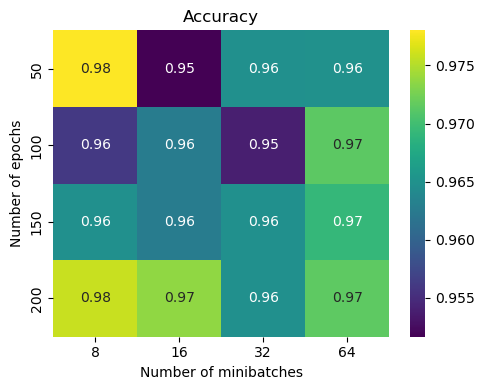

In [29]:
fig, ax = plt.subplots(figsize = (5, 4))
heatmap = sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
heatmap.set_xticklabels(n_minibatches_list)
heatmap.set_yticklabels(n_epochs_list)
ax.set_title("Accuracy")
ax.set_ylabel("Number of epochs")
ax.set_xlabel("Number of minibatches")
plt.tight_layout()
plt.savefig(r"Figures\Task_d\Cancer_tune_epochs_and_minibatches_accuracy.png")
plt.show()


## Numbers of hidden nodes, lambda and learning rate

In [42]:
n_hidden_layers = 2
n_hidden_nodes_list = [2, 4, 6, 8, 10, 12]

n_outputs = 1
n_features = X_train_scaled.shape[1] 

activation_hidden = "sigmoid"

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-5, -2, 4)
lmbd_vals = jnp.insert(lmbd_vals, 0, 0.0)

n_epochs = 50
n_minibatches = 8

accuracy = np.zeros((len(n_hidden_nodes_list), len(learning_rates), len(lmbd_vals)))

kfold = KFold(n_splits=5, shuffle=True)

for k, n_hidden_nodes in enumerate(n_hidden_nodes_list):

    for i, lr in tqdm(enumerate(learning_rates)):

        for j, lmbd in enumerate(lmbd_vals):

            accuracy_crossval = []

            for train_index, val_index in kfold.split(X_train_scaled):

                X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
                target_train_cv, target_val_cv = target_train[train_index], target_train[val_index]

                ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                                      grad_cost_function=grad_cost_logreg,
                                      learning_rate=lr, 
                                      lmbd=lmbd, 
                                      activation_function_hidden="sigmoid",
                                      activation_function_output="sigmoid",
                                      optimizer=None,
                                      classification_problem=True)

                ffnn.train(X_train_cv, target_train_cv, num_iter=n_epochs, n_minibatches=n_minibatches)
                pred_val = ffnn.predict(X_val_cv)

                accuracy_crossval.append(accuracy_score(target_val_cv, pred_val))

            accuracy[k][i][j] = np.mean(accuracy_crossval)

3it [01:11, 23.65s/it]C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
4it [01:34, 23.65s/it]C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
5it [01:56, 23.29s/it]
3it [01:10, 23.46s/it]C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
4it [01:35, 23.80s/it]C:\

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
5it [02:01, 24.22s/it]
3it [01:09, 23.20s/it]C:\Users\vildesn\FYS_STK_

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functi

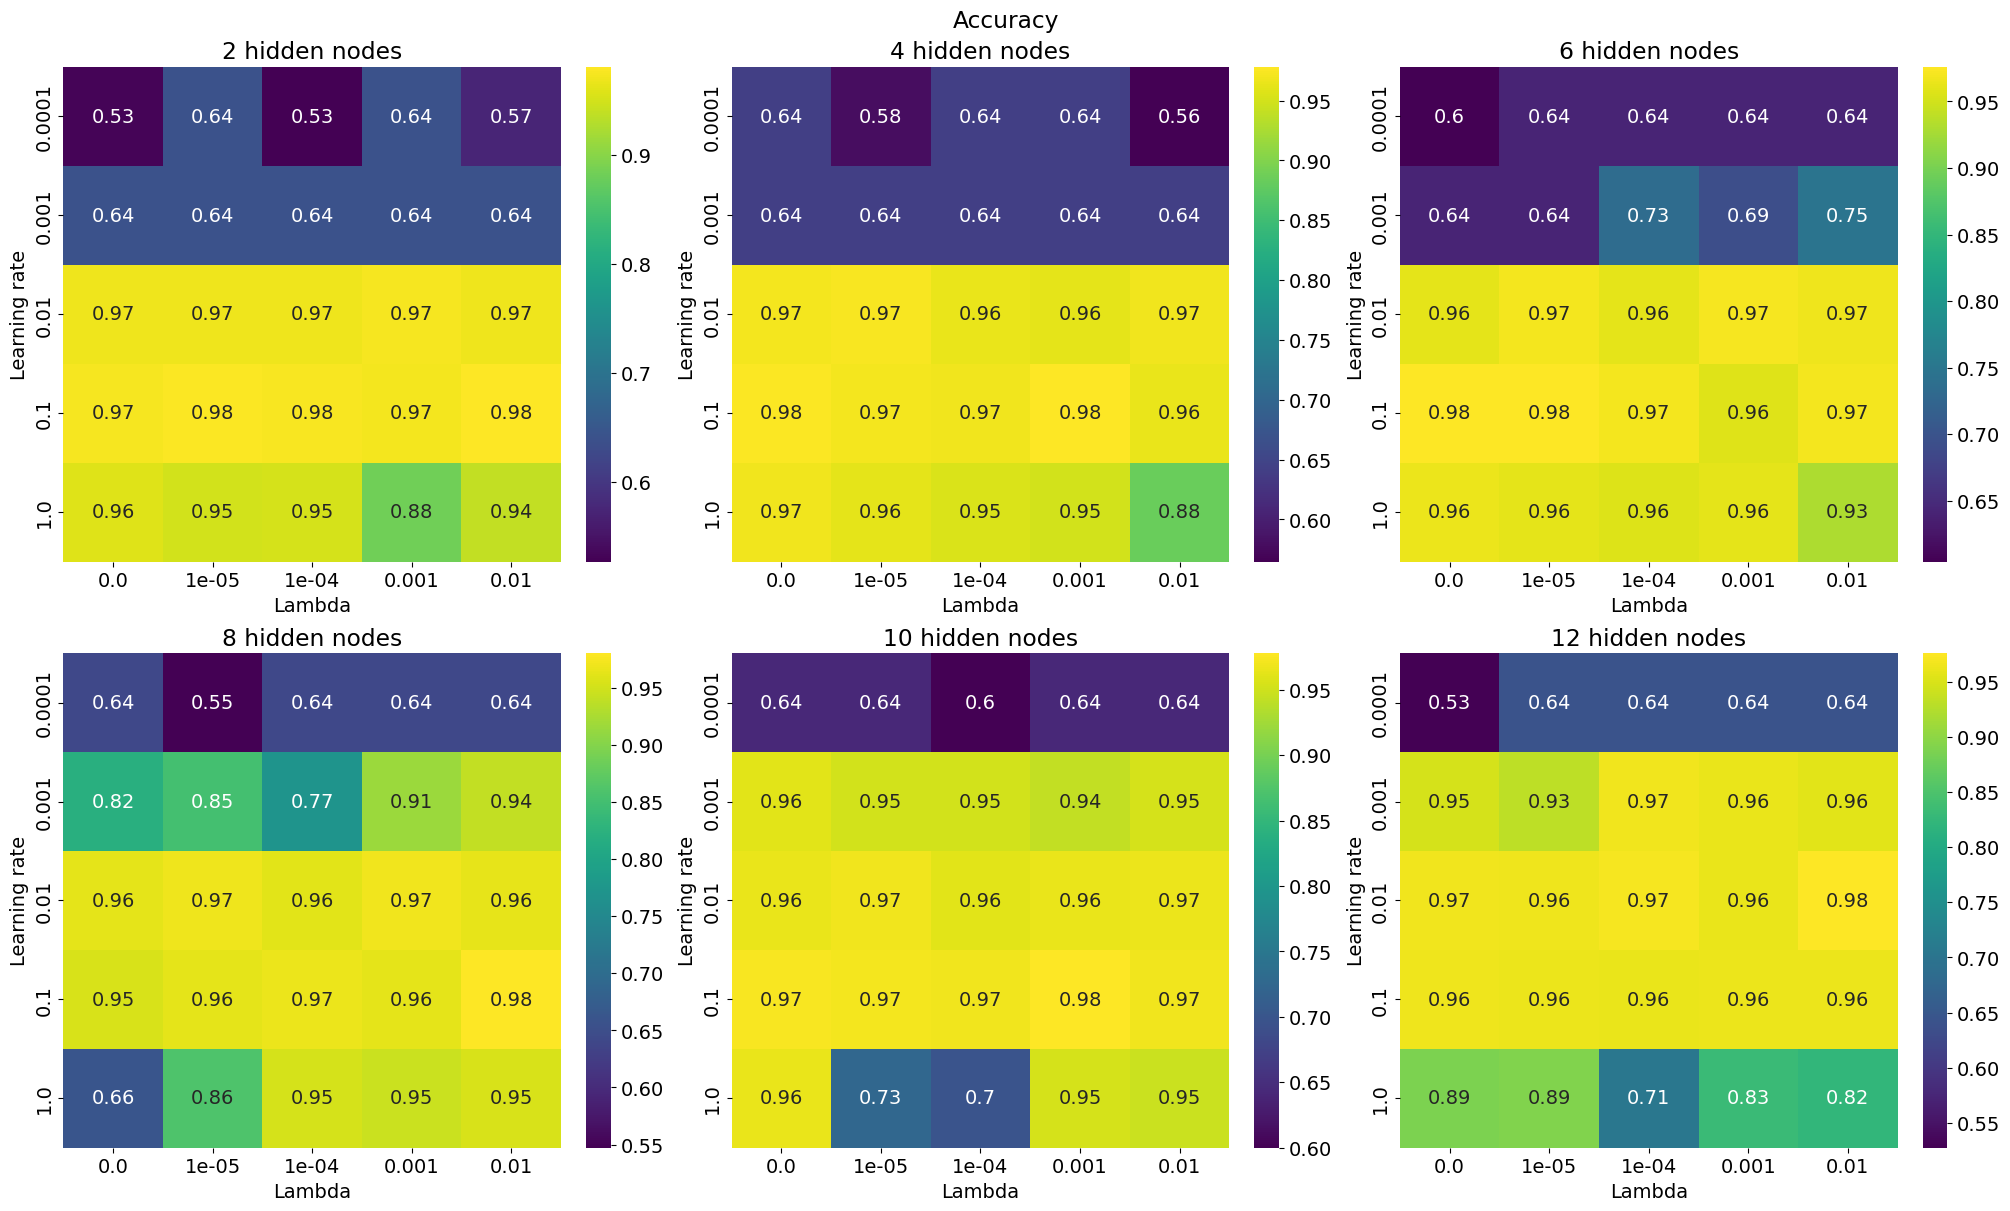

In [43]:

plt.rcParams['font.size'] = 14


fig, axs = plt.subplots(2, 3, figsize=(20, 12), constrained_layout=True)  # Create a figure and subplots

fig.suptitle('Accuracy')

for i, ax in enumerate(axs.flatten()):
    sns.heatmap(accuracy[i], annot=True, ax=ax, cmap="viridis")  # Draw heatmap
    ax.set_title(f"{n_hidden_nodes_list[i]} hidden nodes")
    
    ax.set_xticklabels(lmbd_vals)    
    ax.set_yticklabels(learning_rates)

    ax.set_xlabel('Lambda')  # Set x label
    ax.set_ylabel('Learning rate')  # Set y label

plt.savefig(r"Figures\Task_d\Cancer_tune_lr_lambda_nodes_accuracy.png")
plt.show()


In [46]:
n_hidden_layers = 2
n_hidden_nodes = 2

n_outputs = 1
n_features = X_train_scaled.shape[1] 

activation_hidden = "sigmoid"

learning_rate = 0.1
lmbd = 1e-4

n_epochs = 50
n_minibatches = 8

# Training the network again with all the training data and the tuned parameters
ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                      grad_cost_function=grad_cost_logreg,
                      learning_rate=learning_rate, lmbd=lmbd, 
                      activation_function_hidden="sigmoid",
                      activation_function_output="sigmoid",
                      optimizer=None,
                      classification_problem=True)

ffnn.train(X_train_scaled, target_train, num_iter=n_epochs, n_minibatches=n_minibatches)
pred_test = ffnn.predict(X_test_scaled)

accuracy_test = accuracy_score(target_test, pred_test)

print(f"Accuracy for test data: {accuracy_test}")

Accuracy for test data: 0.9736842105263158
